In [1]:
%%html
<style>.container {width: 98%}</style>

# Principal Component Analysis (PCA)


PCA (aka Karhunen-Loève transform or KLT) is a method with many useful applications such as:
- Decorrelation
- Dimensionality reduction

### Decorrelation
In many scenarios, given a set of multi-dimensional vectors (N dimensions) $X = \{x_i, i=1 \ldots N\}$, it's usefull
to find a linear mapping

$
y = A^T x
$

such that the new vectors $y$ are mutually uncorrelated. This helps remove any redundant information existing in initial data.

The covariance matrix of $y$ is

$
R_y = E[yy^T] = E[A^T x x^T A] = A^T R_x A
$

where $R_x$ can be estimated with $R_x = \frac{1}{n} \sum\limits_{k=0}^{n}x_k x_k^T$ **if** the mean value of 
vectors $x$ is 0.


*That's why, before applying PCA, samples should be normalized to have zero mean value.*


**The goal now is to find the mapping $A$ such that the covariance matrix $R_y$ is diagonal**  
If we achieve this then the $y$ vectors will be uncorrelated

By inspecting the relationship $R_y = A^T R_x A$ we can choose $A$ such that it diagonalizes the matrix $R_x$.  
So the matrix $A$ should have as columns the eigenvectors of $R_x$ and the resulting matrix $R_y$ will be a diagonal  
matrix with the eigenvalues of $R_x$ in its diagonal

$
R_y = 
\begin{pmatrix}
\lambda_1 & 0 \cdots & 0 \\
0 & \lambda_2 & \cdots & 0 \\
\vdots  & \vdots  & \ddots & \vdots  \\
0 & 0 & \cdots & \lambda_N
\end{pmatrix}
$

### Dimensionality Reduction

Given the above mapping $A$ we can express the initial vectors $x$ in terms of the uncorrelated $y$

$
x = Ay
$

since $A^{-1} = A^T$ because $R_x$ is symmetric (by definition).

So, the vector $x$ can be expressed as the **weighted sum** of the column-vectors $a_i$ of the matrix $A$:

$
x = Ay = 
\begin{pmatrix}
& & & \\
& & & \\
a_1 & a_2 & \cdots & a_N \\
& & & \\
& & &
\end{pmatrix}
\cdot
\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_N
\end{pmatrix}
=
\sum\limits_{i=0}^{N} a_i y_i
$

Here the weights are the components $y_i$ and the base vectors are the eigenvectors of $R_x$.

It can be shown that selecting only a few of the base vectors, we can approximate $x$.  
Indeed, selecting the eigenvectors corresponding to the largest eigenvalues, this approximation is optimal  
in terms of Mean Square Error.

This is equivalent to setting some of the last (corresponding to smallest eigenvalues) $y_i$ to 0

$
x = Ay = 
\begin{pmatrix}
& & & & \\
& & & & \\
a_1 & a_2 & \cdots & 0 & 0 \\
& & & & \\
& & & &
\end{pmatrix}
\cdot
\begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
0 \\
0
\end{pmatrix}
=
\sum\limits_{i=0}^{m} a_i y_i
$

where $m < N$

And this is how we achieve dimensionality reduction where the reduced space is the space of  
vectors $y$ with only the components corresponding to the largest eigenvalues of $R_x$.

In [2]:
%load_ext autoreload
%autoreload 2

In [133]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, "../../")
from fromscratch.unsupervised.pca import PCA

### Produce some fake Gaussian 3D data with non-zero covariance

In [134]:
n = 1000
d = 2

# Random positive-definite covariance matrix
c = np.random.random((d, d))
c = c.dot(c.T)

X = np.random.multivariate_normal(np.zeros(d), c, n)

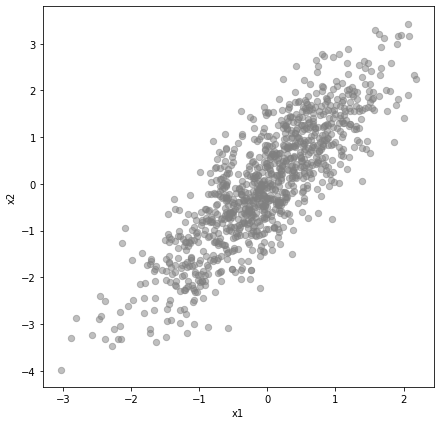

In [163]:
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c="grey", alpha=0.5, s=40)

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### Decorrelate data

In [158]:
pca = PCA(n_components=2)

pca.fit(X)
Y = pca.transform(X)

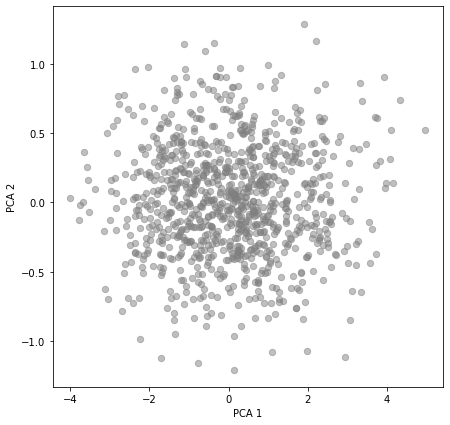

In [162]:
plt.figure(figsize=(7, 7))
plt.scatter(Y[:, 0], Y[:, 1], c="grey", alpha=0.5, s=40)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()